In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Rescaling
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [5]:
import keras_tuner as kt 

## #Get the number of images for train and validation 

In [6]:
# find out number of images for train and validation
train_cat_image_path = "data/train/cat"
train_dog_image_path = "data/train/dog"
val_cat_image_path = "data/val/cat"
val_dog_image_path = "data/val/dog"

train_cat_image_names = os.listdir(path=train_cat_image_path)
train_dog_image_names = os.listdir(path=train_dog_image_path)
val_cat_image_names = os.listdir(path=val_cat_image_path)
val_dog_image_names = os.listdir(path=val_dog_image_path)
total_train_images = len(train_cat_image_names) + len(train_dog_image_names)
total_val_images = len(val_cat_image_names) + len(val_dog_image_names)

# #Define the variables(we can keep these in a config file if required and read from here

In [7]:
# keeping image hight and weight small, so that I can train model quickly because of system configuration
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
IMAGE_CHANNEL = 3
BATCH_SIZE = 32

TRAIN_STEPS_PER_EPOCHS = int(total_train_images/BATCH_SIZE)
VAL_STEPS_PER_EPOCHS = int(total_val_images/BATCH_SIZE)
print(f"TRAIN_STEPS_PER_EPOCHS: {TRAIN_STEPS_PER_EPOCHS}, VAL_STEPS_PER_EPOCHS: {VAL_STEPS_PER_EPOCHS}")

TRAIN_STEPS_PER_EPOCHS: 781, VAL_STEPS_PER_EPOCHS: 3


# #Define model creation

In [8]:
# keeping model architecture very small so that I can train it quickly
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation=relu, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL)))
    model.add(MaxPool2D(pool_size=(2,2), strides=1, padding="valid", data_format="channels_last"))
    model.add(Flatten())
    model.add(Dense(units=32, activation=relu))
    model.add(Dense(units=1, activation=sigmoid))    
    model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=["accuracy"])
    return model     

In [9]:
# create the model
model = build_model()

In [10]:
# create traing and vlidation generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# load data from train and validation directory
train_generator = train_datagen.flow_from_directory("data/train",
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="binary")
val_generator = val_datagen.flow_from_directory("data/val",
                                                target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                batch_size=BATCH_SIZE,
                                                class_mode="binary")

Found 25000 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [12]:
# let's have a look at the created model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 691488)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                22127648  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 22,128,577
Trainable params: 22,128,577
Non-trainable params: 0
_________________________________________________________________


# #Train the model

In [13]:
# keeping epochs small, again to train the model quickly
model.fit(train_generator,
          steps_per_epoch=TRAIN_STEPS_PER_EPOCHS,
          epochs=5,
          validation_data=val_generator,
          validation_steps=VAL_STEPS_PER_EPOCHS)

Epoch 1/5
781/781 [==============================] - 383s 490ms/step - loss: 0.8268 - accuracy: 0.4940 - val_loss: 0.6937 - val_accuracy: 0.4271
Epoch 2/5
781/781 [==============================] - 384s 491ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 3/5
781/781 [==============================] - 370s 473ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 4/5
781/781 [==============================] - 364s 466ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6931 - val_accuracy: 0.5208
Epoch 5/5
781/781 [==============================] - 1143s 1s/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.4792


In [54]:
# let's look the model train/validation loss and training/validation acc
# this will given us an idea if there is any bias or overfitting of the model

In [12]:
history_obj = model.history.history

In [25]:
#history_obj

In [14]:
# get train/validation loss and training/validation accruacy from the history object of the model
train_loss = history_obj["loss"]
train_accuracy = history_obj["accuracy"]
val_loss = history_obj["val_loss"]
val_accuracy = history_obj["val_accuracy"]
epochs = 5

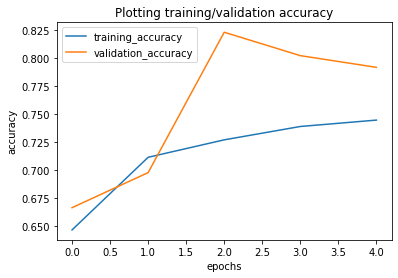

In [23]:
# Plot training and validation accuracy per epoch to see how the train/validation happens
plt.plot(range(epochs), train_accuracy)
plt.plot(range(epochs), val_accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["training_accuracy", "validation_accuracy"])
plt.title("Plotting training/validation accuracy")
plt.show()

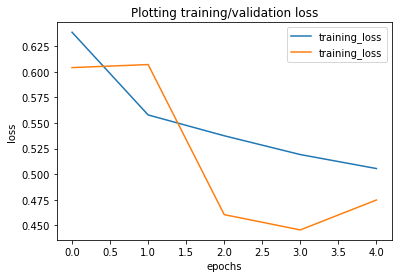

In [24]:
# Plot training and validation loss per epoch to see how the train/validation happens
plt.plot(range(epochs), train_loss)
plt.plot(range(epochs), val_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["training_loss", "training_loss"])
plt.title("Plotting training/validation loss")
plt.show()

# Analysis of the above accuracy/loss graph:
From the above accuracy/loss graphs, it looks like even though the validation accuracy is increasing and validation loss is decreasing compared to training accuracy/loss, there is a little bit of variance.  Maybe we can use a little bit of dropout to see if that helps of not.
If there is overfitting, we can use data augmentation techniques using flipping, rotating, sheering, cropping of the image to generate more samples for each categroy.
We can also use dropout to reduce overfitting.

# I will use Keras Tuner to find out the different hyperparameters for the above model such as follows:
    * how many convolution/pooling layers to add, 
    * how many units each convolution layer should have
    * what kernel size is better, for example 3, 5, 7
    * what optimizer will be better, for example Adam or RMSProp
    * what learning rate is best suited for this problem
    * is dropout needed, if needed what value of dropout is required, for example [0.1, 0.2, 0.3]    

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

In [10]:
# load the training datasource from the data directory
data_directory = "data/train"
train_datasource = image_dataset_from_directory(data_directory,
                                              validation_split=0.2,
                                              subset="training",
                                              seed=123,
                                              image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                              batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [11]:
# load the validation datasource from the data directory
val_datasource = image_dataset_from_directory(data_directory,
                                              validation_split=0.2,
                                              subset="validation",
                                              seed=123,
                                              image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                              batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [12]:
class_names = train_datasource.class_names
print(class_names)

['cat', 'dog']


In [21]:
# check the image shape, batchsize/height/width/colorchannel(32/64/64/3)
for image_batch, labels_batch in train_datasource:
    print(f"image_batch_shape: {image_batch.shape}")
    print(f"label_batch_shape: {labels_batch.shape}")
    break

image_batch_shape: (32, 64, 64, 3)
label_batch_shape: (32,)


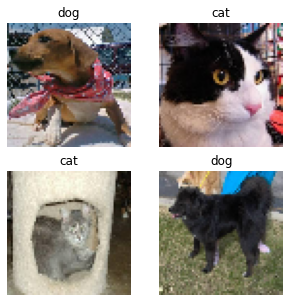

In [17]:
# lets visualize few images
plt.figure(figsize=(5, 5))
for images, labels in train_datasource.take(1):
      for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
# using tf.Data and Dataset to process images to have improved performance and avoid memory bottle-neck
AUTOTUNE = tf.data.AUTOTUNE
train_datasource_c = train_datasource.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_datasource_c = val_datasource.cache().prefetch(buffer_size=AUTOTUNE) 

In [108]:
# keeping model architecture very small so that I can train it quickly
def build_model_kt(hp):
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_HEIGHT, IMAGE_CHANNEL)))
    model.add(Conv2D(filters=hp.Choice("units", [32, 64, 128]), kernel_size=hp.Choice("kernel_size", [3, 5]), activation=relu))
    model.add(MaxPool2D(pool_size=(2,2), strides=1, padding="valid", data_format="channels_last"))
    model.add(Flatten())
    model.add(Dense(units=1, activation=sigmoid))    
    model.compile(optimizer=Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), loss="binary_crossentropy", metrics=["accuracy"])
    return model     

# Other Hyperparameters
I have used units and kernel_size for conv layer and learning_rate as hyperparameter, so that I can search hyperparameters quickly.
We can also set the following as hyperparamer and find their optimal value for the model, so that the model pefrom best with those hyperparmeters:
1. number of conv/pooling operation
2. optimizer
3. if dropout needed
4. dropout rate

In [104]:
# extract a small protion of data from full data set to perform hyperparameter tuning.  Just to make hyperparameter tuning faster, not using full data
x_train = []
y_train = []
for i in range(1, 5):
    for images, labels in train_datasource_c.take(i):
        x_train.extend(images)
        y_train.extend(labels)        
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = []
y_val = []
for i in range(1, 5):
    for images, labels in val_datasource_c.take(i):
        x_val.extend(images)
        y_val.extend(labels)        
x_val = np.array(x_val)
y_val = np.array(y_val)

In [62]:
x_train.shape

(320, 64, 64, 3)

In [63]:
y_train.shape

(320,)

In [69]:
# perform hyperparameter tuning
tuner = kt.RandomSearch(build_model_kt, objective="val_loss", max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [70]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Trial 6 Complete [00h 00m 11s]
val_loss: 0.67787104845047

Best val_loss So Far: 0.6456478238105774
Total elapsed time: 00h 00m 35s
INFO:tensorflow:Oracle triggered exit


In [103]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print(best_hps.values)

{'units': 128, 'kernel_size': 3, 'learning_rate': 0.0001}


In [99]:
model = build_model_kt(best_hps)

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 476288)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 476289    
Total params: 479,873
Trainable params: 479,873
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Let's train the model with the whole data, chooseing less epoch to train it faster
epochs = 20
model_history = model.fit(train_datasource_c, validation_data=val_datasource_c, epochs=epochs)

Epoch 1/20
625/625 [==============================] - 135s 215ms/step - loss: 0.4126 - accuracy: 0.8161 - val_loss: 0.4882 - val_accuracy: 0.7680
Epoch 2/20
625/625 [==============================] - 129s 207ms/step - loss: 0.3951 - accuracy: 0.8288 - val_loss: 0.4947 - val_accuracy: 0.7632
Epoch 3/20
625/625 [==============================] - 135s 217ms/step - loss: 0.3781 - accuracy: 0.8384 - val_loss: 0.4864 - val_accuracy: 0.7754
Epoch 4/20
625/625 [==============================] - 142s 228ms/step - loss: 0.3652 - accuracy: 0.8448 - val_loss: 0.4939 - val_accuracy: 0.7682
Epoch 5/20
625/625 [==============================] - 136s 218ms/step - loss: 0.3516 - accuracy: 0.8533 - val_loss: 0.4893 - val_accuracy: 0.7684
Epoch 6/20
625/625 [==============================] - 135s 216ms/step - loss: 0.3402 - accuracy: 0.8597 - val_loss: 0.5012 - val_accuracy: 0.7708
Epoch 7/20
625/625 [==============================] - 135s 215ms/step - loss: 0.3289 - accuracy: 0.8655 - val_loss: 0.5004 -

In [109]:
model.save("dog_vs_cat_cnn_v1.h5")

In [112]:
history_obj = model_history.history

In [113]:
train_loss = history_obj["loss"]
train_accuracy = history_obj["accuracy"]
val_loss = history_obj["val_loss"]
val_accuracy = history_obj["val_accuracy"]

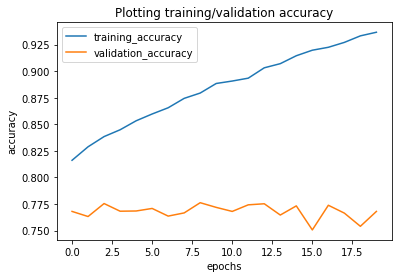

In [114]:
# Plot training and validation accuracy per epoch to see how the train/validation happens
plt.plot(range(epochs), train_accuracy)
plt.plot(range(epochs), val_accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["training_accuracy", "validation_accuracy"])
plt.title("Plotting training/validation accuracy")
plt.show()

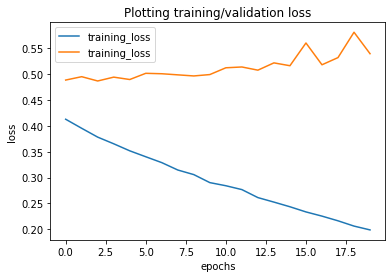

In [115]:
# Plot training and validation loss per epoch to see how the train/validation happens
plt.plot(range(epochs), train_loss)
plt.plot(range(epochs), val_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["training_loss", "training_loss"])
plt.title("Plotting training/validation loss")
plt.show()

# Analysis of the above accuracy/loss graph:

As can be seen from the above accuracy and loss plots, there is overfitting.
For accuracy, the training_accuracy increases with every epoch whereas validation_accuracy fluctuates and does not increase after certain value.
For loss, the training_loss continues to decrease with every epoch wheres validation_loss fluctuates and continues to increase.
There are two possible soultions to this:
1. Can perform image augmentation to provide more images for different types
1. Can add Dropout regularization

In [120]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Dropout

In [121]:
data_augmentation = keras.Sequential([RandomFlip("horizontal", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL)),
                                      RandomRotation(0.1),
                                      RandomZoom(0.1)])

In [1]:
# using previously tuned hyperparameter values along with Dropout.  # {'units': 128, 'kernel_size': 3, 'learning_rate': 0.0001}
# can also add dropout to hyperparameter list and find best value using kerastuner
# also adding data_augmentation
def build_model_final():
    model = Sequential()
    model.add(data_augmentation)
    model.add(Rescaling(1./255))
    model.add(Conv2D(filters=64, kernel_size=3, activation=relu))
    model.add(MaxPool2D(pool_size=(2,2), strides=1, padding="valid", data_format="channels_last")) 
    model.add(Conv2D(filters=128, kernel_size=3, activation=relu))
    model.add(MaxPool2D(pool_size=(2,2), strides=1, padding="valid", data_format="channels_last")) 
    model.add(Flatten())
    model.add(Dense(units=128, activation=relu))  
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation=sigmoid))    
    model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
    return model    

In [149]:
final_model = build_model_final()

In [ ]:
epochs = 10
final_model_history = final_model.fit(train_datasource_c, validation_data=val_datasource_c, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 575s 917ms/step - loss: 2.3092 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.4886
Epoch 2/10
625/625 [==============================] - 502s 804ms/step - loss: 0.6932 - accuracy: 0.5070 - val_loss: 0.6929 - val_accuracy: 0.5114
Epoch 3/10
625/625 [==============================] - 388s 620ms/step - loss: 0.6935 - accuracy: 0.4943 - val_loss: 0.6939 - val_accuracy: 0.4886
Epoch 4/10
625/625 [==============================] - 490s 784ms/step - loss: 0.6934 - accuracy: 0.5023 - val_loss: 0.6936 - val_accuracy: 0.4886
Epoch 5/10
625/625 [==============================] - 1270s 2s/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6947 - val_accuracy: 0.4886
Epoch 6/10
625/625 [==============================] - 412s 659ms/step - loss: 0.6932 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5114
Epoch 7/10
625/625 [==============================] - 643s 1s/step - loss: 0.6935 - accuracy: 0.4961 - val_loss: 0.6935 - val_

In [152]:
final_model.save("dog_vs_cat_cnn_with_dropout_v2.h5")